In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
train_dir = '/kaggle/input/fer2013/train/'
test_dir = '/kaggle/input/fer2013/test/'

In [3]:
num_train_folders = len([folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))])
num_test_folders = len([folder for folder in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, folder))])

print(f"Number of folders (classes) in the train directory: {num_train_folders}")
print(f"Number of folders (classes) in the test directory: {num_test_folders}")

Number of folders (classes) in the train directory: 7
Number of folders (classes) in the test directory: 7


In [4]:
def get_subfolders_and_image_counts(directory):
    subfolders = {}
    for subdir, dirs, files in os.walk(directory):
        if dirs:
            for folder in dirs:
                folder_path = os.path.join(subdir, folder)
                num_images = len([file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))])
                subfolders[folder] = num_images
    return subfolders

train_subfolders = get_subfolders_and_image_counts(train_dir)
test_subfolders = get_subfolders_and_image_counts(test_dir)

In [5]:
print("Training Subfolders and Image Counts:")
for folder, count in train_subfolders.items():
    print(f"{folder}: {count} images")

print("\nTest Subfolders and Image Counts:")
for folder, count in test_subfolders.items():
    print(f"{folder}: {count} images")

Training Subfolders and Image Counts:
surprise: 3171 images
fear: 4097 images
angry: 3995 images
neutral: 4965 images
sad: 4830 images
disgust: 436 images
happy: 7215 images

Test Subfolders and Image Counts:
surprise: 831 images
fear: 1024 images
angry: 958 images
neutral: 1233 images
sad: 1247 images
disgust: 111 images
happy: 1774 images


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = {
    'Category': ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy'] * 2,
    'Count': [3171, 4097, 3995, 4965, 4830, 436, 7215, 831, 1024, 958, 1233, 1247, 111, 1774],
    'Dataset': ['Training'] * 7 + ['Test'] * 7
}

df = pd.DataFrame(data)

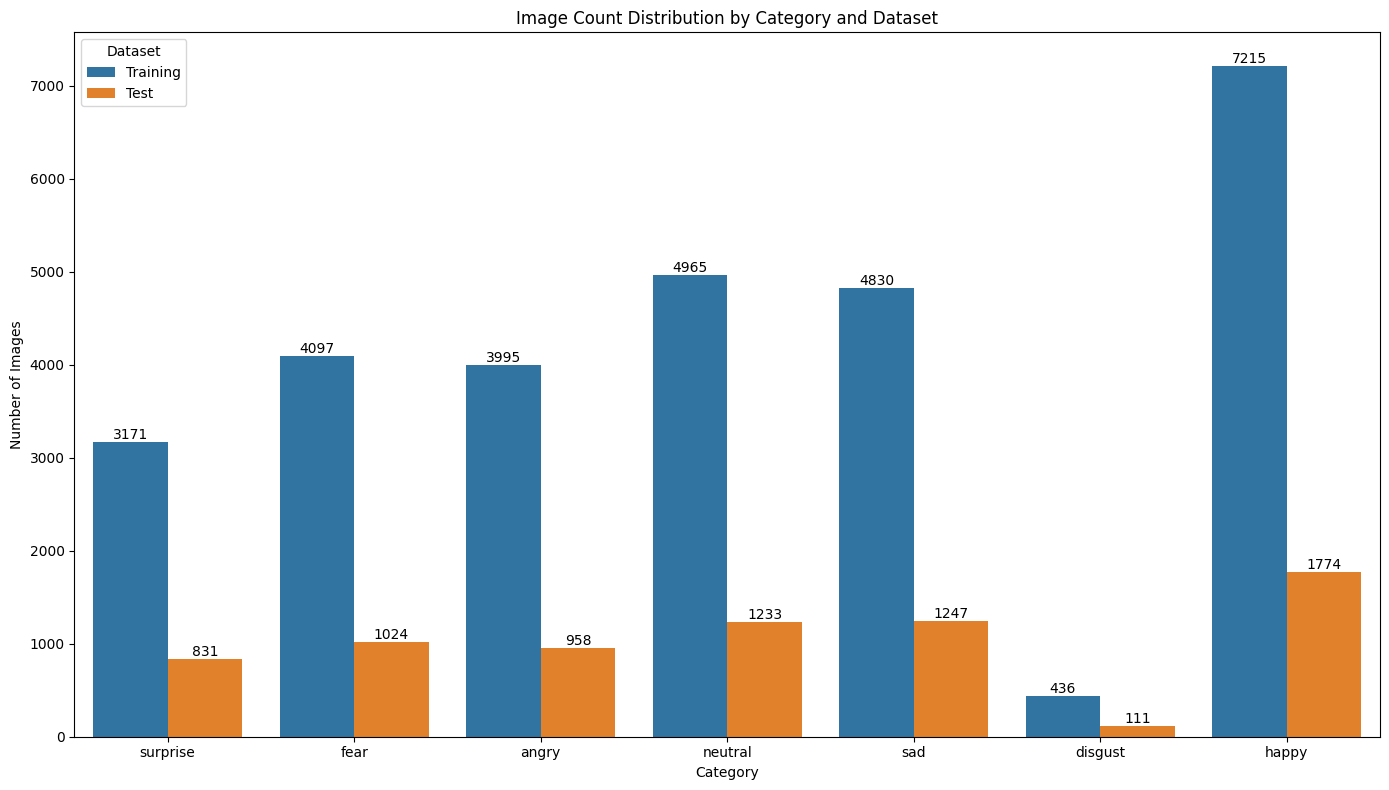

In [8]:
plt.figure(figsize=(14, 8))

ax = sns.barplot(x='Category', y='Count', hue='Dataset', data=df)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height
    ax.annotate(f'{int(height)}', (x, y), ha='center', va='bottom', fontsize=10)

plt.title('Image Count Distribution by Category and Dataset')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.legend(title='Dataset')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
train_counts = {
    'Category': ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy'],
    'Count': [3171, 4097, 3995, 4965, 4830, 436, 7215]
}

test_counts = {
    'Category': ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy'],
    'Count': [831, 1024, 958, 1233, 1247, 111, 1774]
}

df_train = pd.DataFrame(train_counts)
df_test = pd.DataFrame(test_counts)

In [10]:
total_train = df_train['Count'].sum()
total_test = df_test['Count'].sum()

In [11]:
df_train['Percentage'] = (df_train['Count'] / total_train) * 100
df_test['Percentage'] = (df_test['Count'] / total_test) * 100

print("Training Dataset Percentages:")
for _, row in df_train.iterrows():
    print(f"{row['Category'].capitalize()}: {row['Percentage']:.2f}%")

print("\nTest Dataset Percentages:")
for _, row in df_test.iterrows():
    print(f"{row['Category'].capitalize()}: {row['Percentage']:.2f}%")

Training Dataset Percentages:
Surprise: 11.05%
Fear: 14.27%
Angry: 13.92%
Neutral: 17.29%
Sad: 16.82%
Disgust: 1.52%
Happy: 25.13%

Test Dataset Percentages:
Surprise: 11.58%
Fear: 14.27%
Angry: 13.35%
Neutral: 17.18%
Sad: 17.37%
Disgust: 1.55%
Happy: 24.71%


In [12]:
import cv2

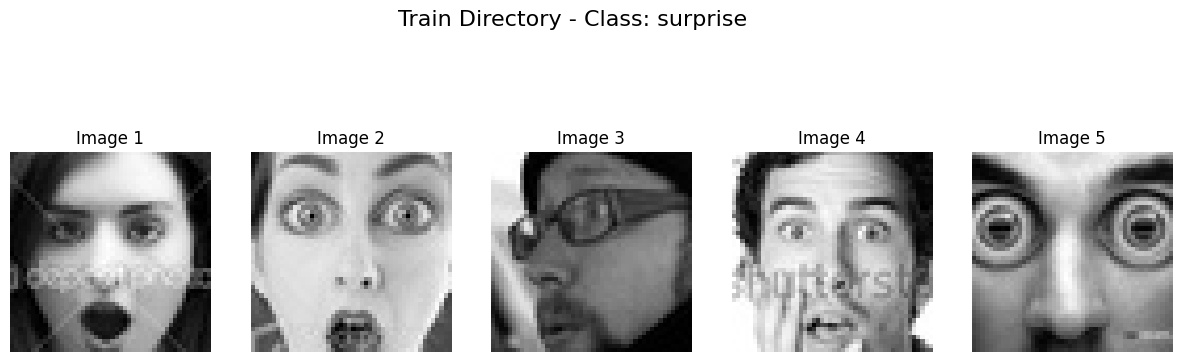

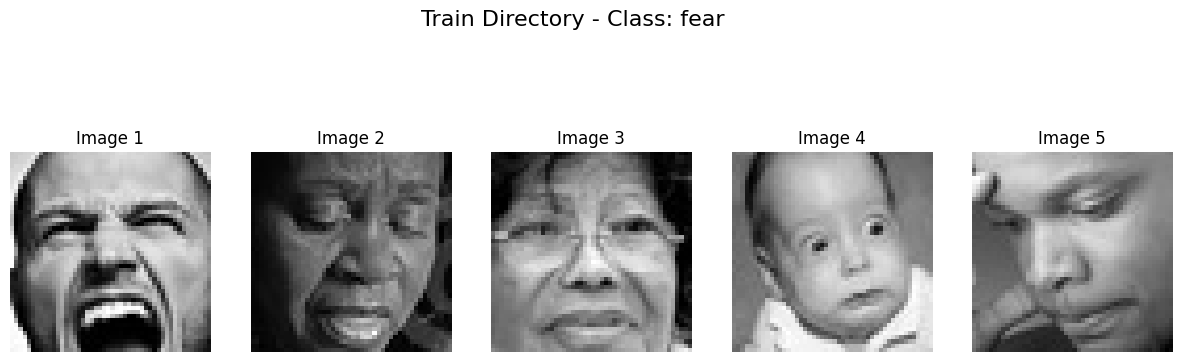

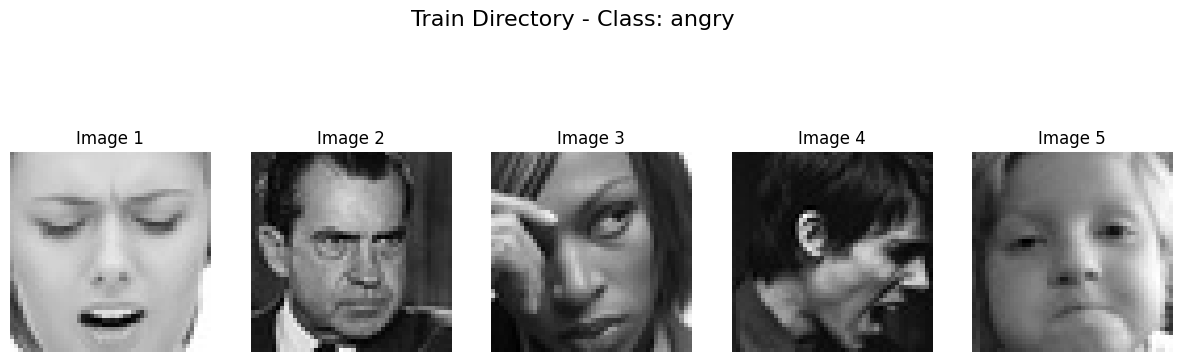

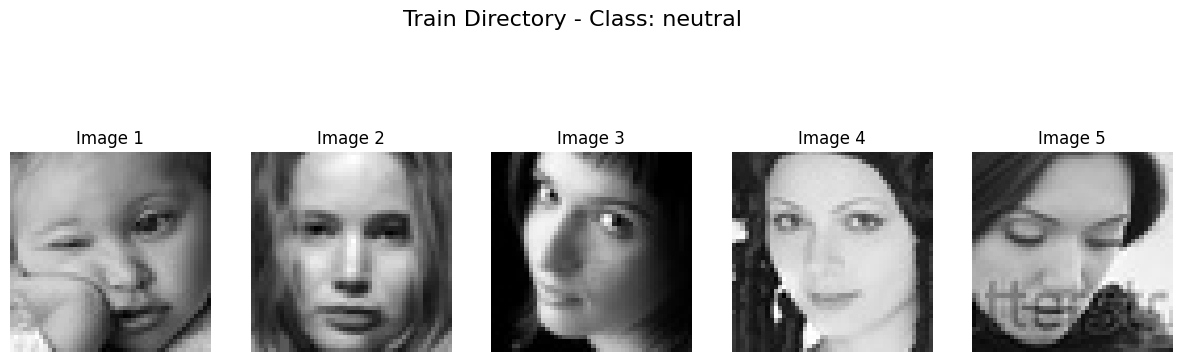

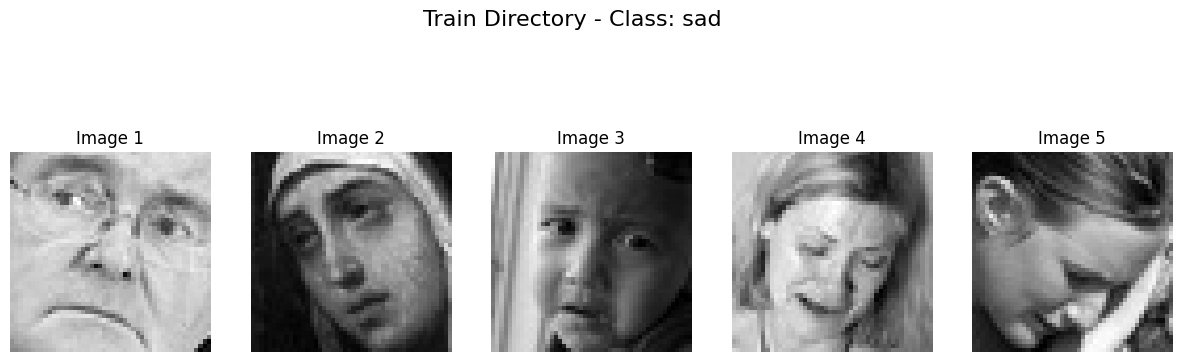

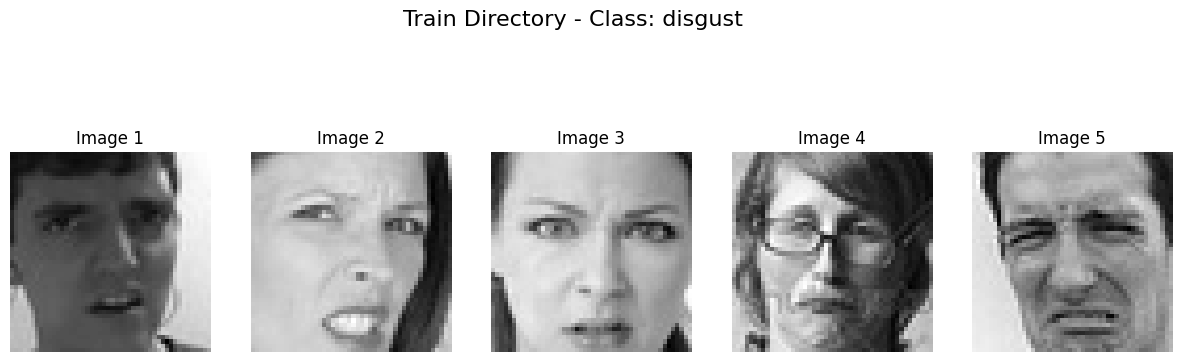

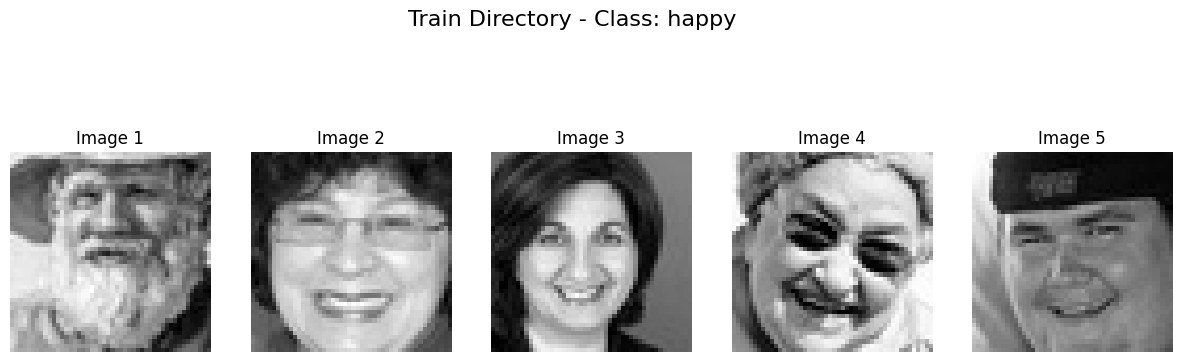

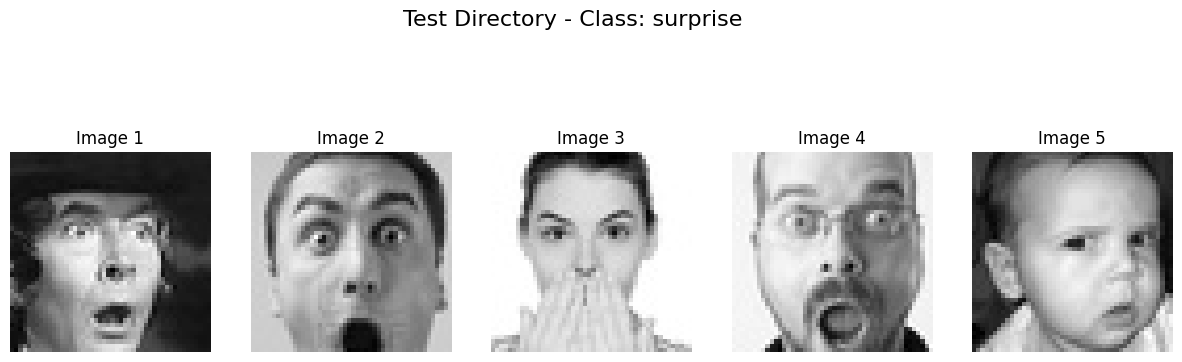

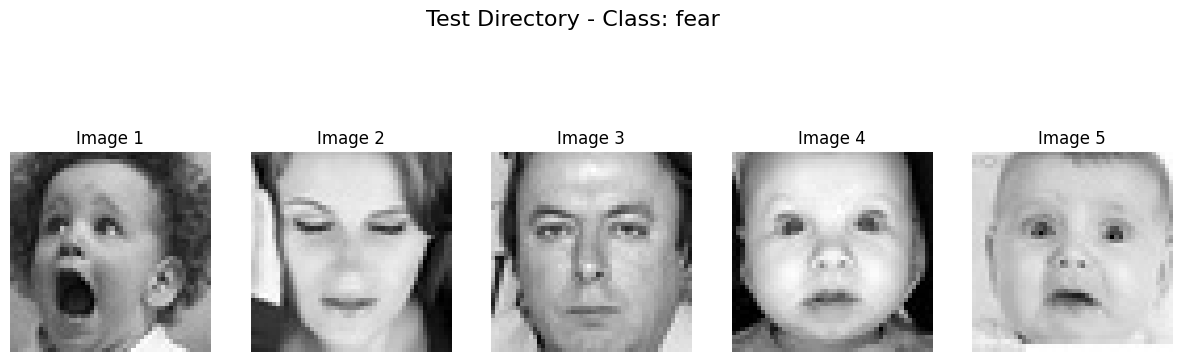

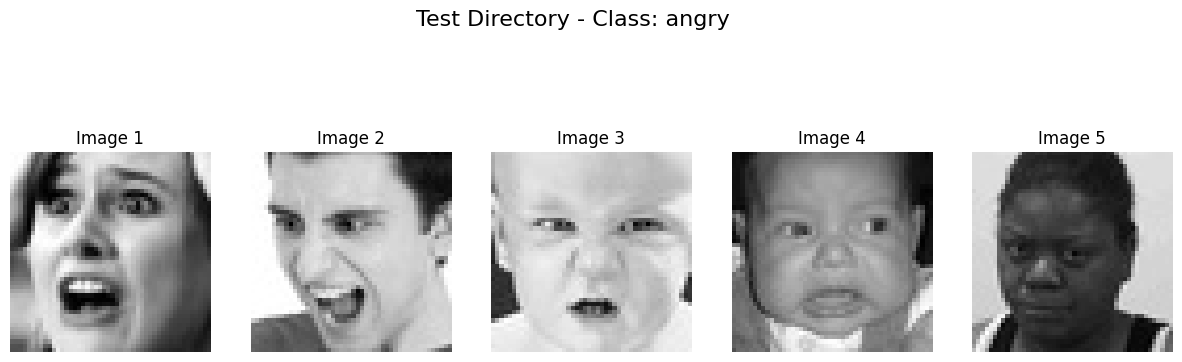

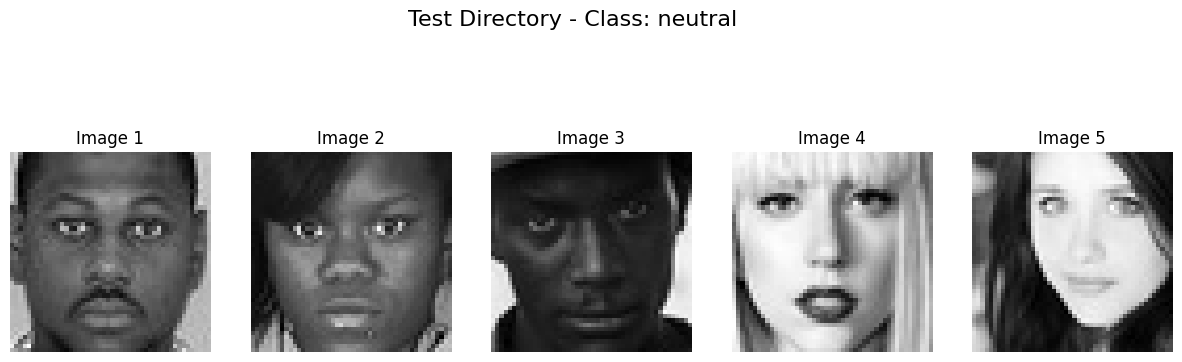

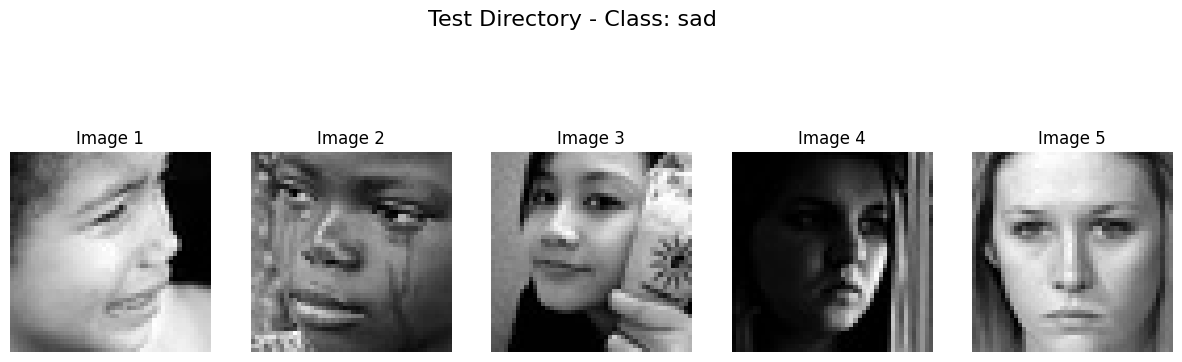

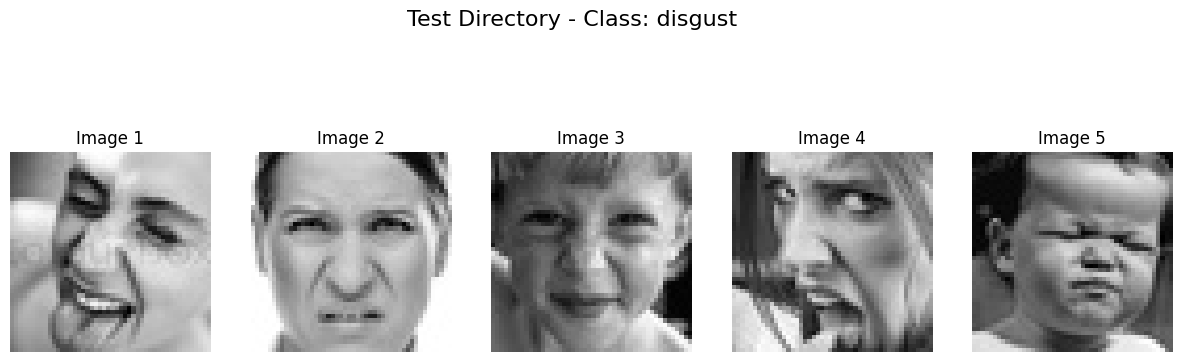

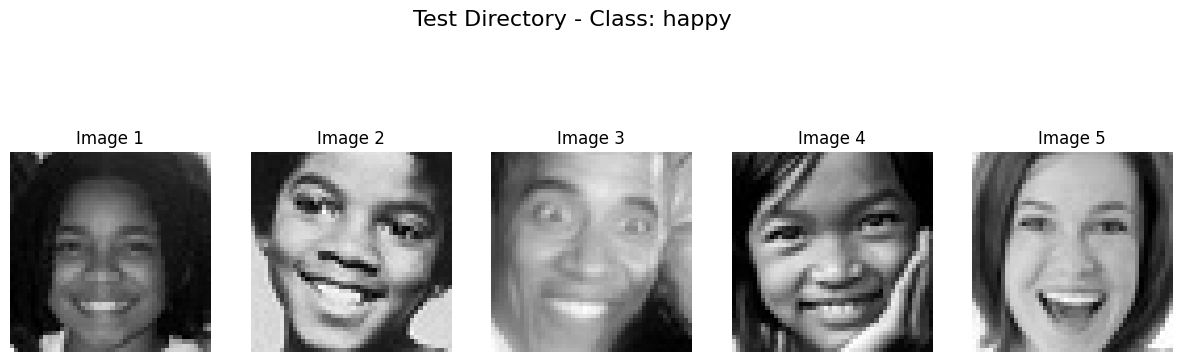

In [13]:
def display_images_from_folders(directory, title):
 
    folders = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
    
    for folder in folders:
        folder_path = os.path.join(directory, folder)
        image_files = os.listdir(folder_path)[:5]  
        
        fig, axes = plt.subplots(1, 5, figsize=(15, 5))
        fig.suptitle(f"{title} - Class: {folder}", fontsize=16)
        
        for i, image_file in enumerate(image_files):
            image_path = os.path.join(folder_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            axes[i].imshow(image, cmap='gray')
            axes[i].axis('off')  
            axes[i].set_title(f"Image {i+1}")
        
        plt.show()

display_images_from_folders(train_dir, 'Train Directory')

display_images_from_folders(test_dir, 'Test Directory')

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_generator.class_indices.keys())

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


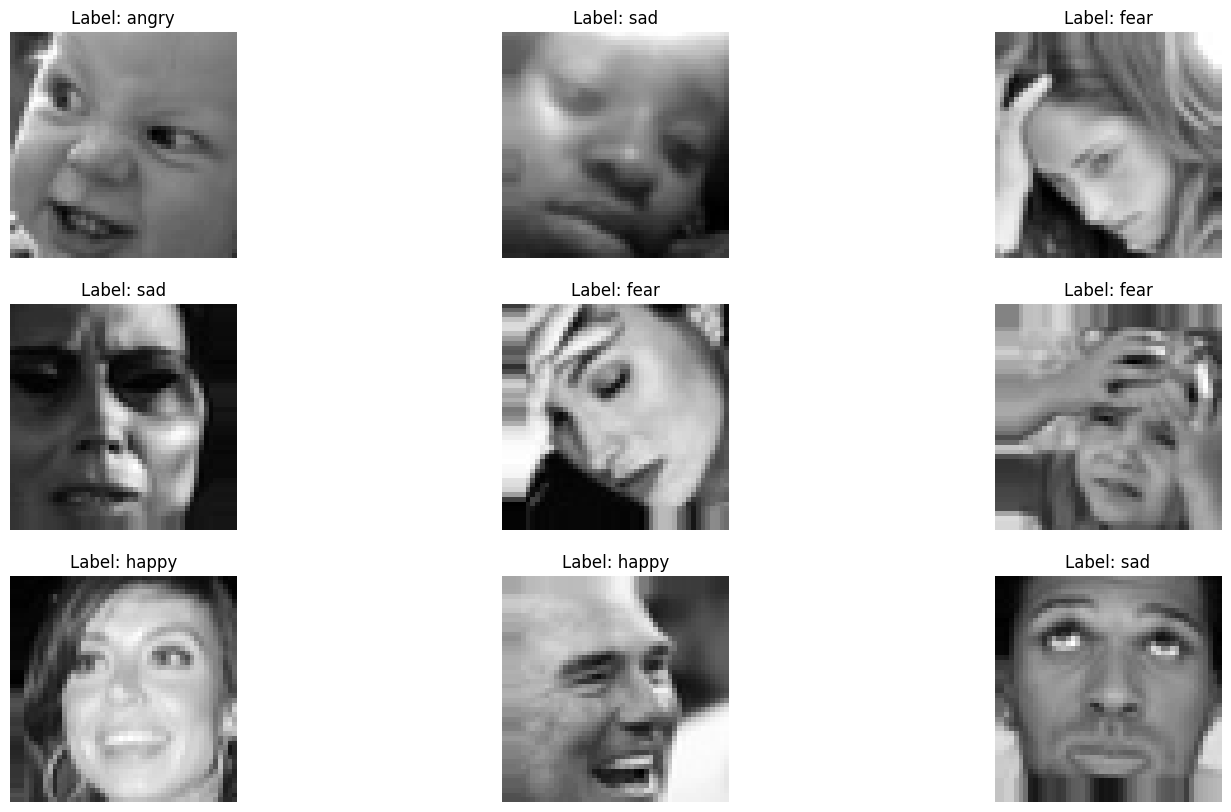

In [16]:
def visualize_samples(generator):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(18, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(x_batch[i].reshape(48, 48), cmap='gray')
        label_index = np.argmax(y_batch[i])
        plt.title(f"Label: {class_names[label_index]}")
        plt.axis('off')
    plt.show()

visualize_samples(train_generator)

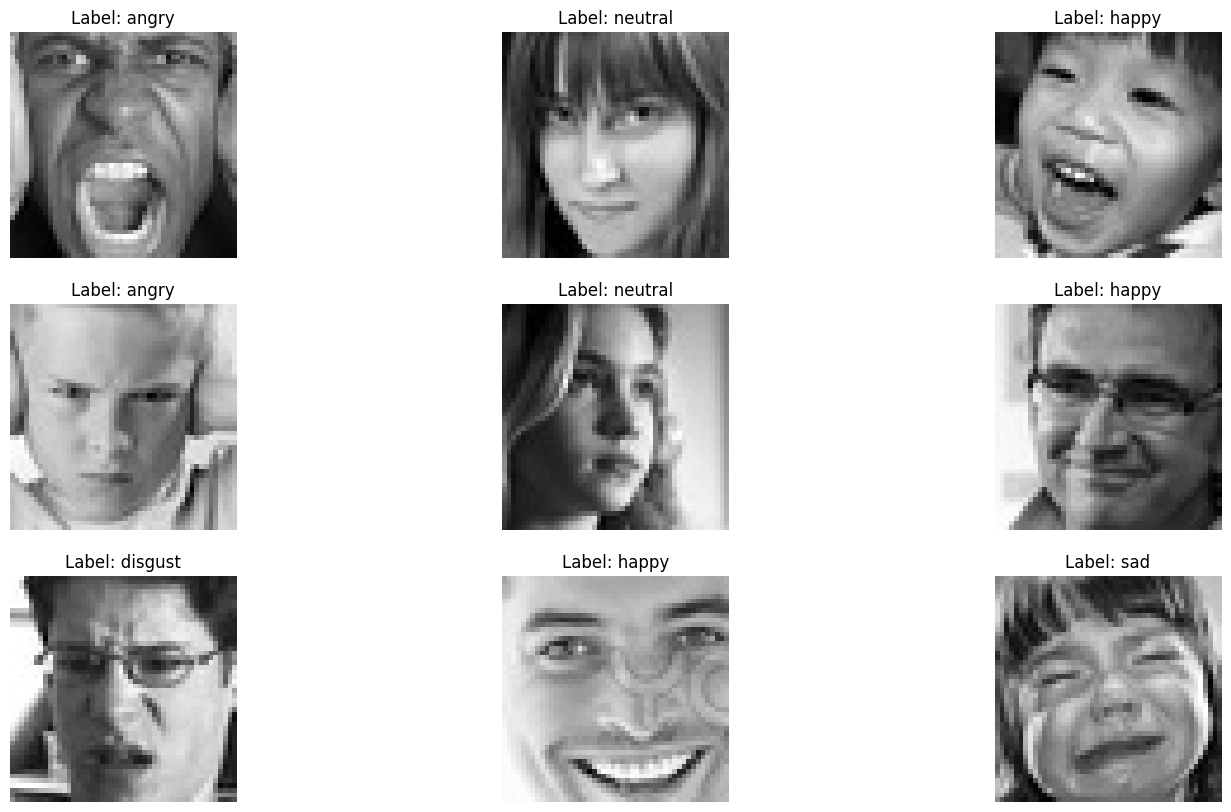

In [17]:
visualize_samples(validation_generator)

In [18]:
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [19]:
train_df

,filepaths,labels
0,/kaggle/input/fer2013/train/surprise/Training_...,surprise
1,/kaggle/input/fer2013/train/surprise/Training_...,surprise
2,/kaggle/input/fer2013/train/surprise/Training_...,surprise
3,/kaggle/input/fer2013/train/surprise/Training_...,surprise
4,/kaggle/input/fer2013/train/surprise/Training_...,surprise
...,...,...
28704,/kaggle/input/fer2013/train/happy/Training_188...,happy
28705,/kaggle/input/fer2013/train/happy/Training_165...,happy
28706,/kaggle/input/fer2013/train/happy/Training_108...,happy
28707,/kaggle/input/fer2013/train/happy/Training_304...,happy


In [20]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(train_df[['filepaths']], train_df['labels'])

balanced_train_df = pd.DataFrame({
    'filepaths': X_resampled['filepaths'],
    'labels': y_resampled
})


In [21]:
balanced_train_df['labels'].unique()

array(['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy'],
      dtype=object)

In [22]:
balanced_train_df['labels'].value_counts()

labels
surprise    7215
fear        7215
angry       7215
neutral     7215
sad         7215
disgust     7215
happy       7215
Name: count, dtype: int64

In [23]:
balanced_train_df

,filepaths,labels
0,/kaggle/input/fer2013/train/surprise/Training_...,surprise
1,/kaggle/input/fer2013/train/surprise/Training_...,surprise
2,/kaggle/input/fer2013/train/surprise/Training_...,surprise
3,/kaggle/input/fer2013/train/surprise/Training_...,surprise
4,/kaggle/input/fer2013/train/surprise/Training_...,surprise
...,...,...
50500,/kaggle/input/fer2013/train/surprise/Training_...,surprise
50501,/kaggle/input/fer2013/train/surprise/Training_...,surprise
50502,/kaggle/input/fer2013/train/surprise/Training_...,surprise
50503,/kaggle/input/fer2013/train/surprise/Training_...,surprise


In [24]:
filepaths = []
labels = []

folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [25]:
ts_df

,filepaths,labels
0,/kaggle/input/fer2013/test/surprise/PublicTest...,surprise
1,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise
2,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise
3,/kaggle/input/fer2013/test/surprise/PublicTest...,surprise
4,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise
...,...,...
7173,/kaggle/input/fer2013/test/happy/PublicTest_13...,happy
7174,/kaggle/input/fer2013/test/happy/PublicTest_70...,happy
7175,/kaggle/input/fer2013/test/happy/PublicTest_24...,happy
7176,/kaggle/input/fer2013/test/happy/PrivateTest_7...,happy


In [26]:
ts_df['labels'].unique()

array(['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy'],
      dtype=object)

In [27]:
ts_df['labels'].value_counts()

labels
happy       1774
sad         1247
neutral     1233
fear        1024
angry        958
surprise     831
disgust      111
Name: count, dtype: int64

In [28]:
ros = RandomOverSampler(random_state=42)
X_resampled_ts, y_resampled_ts = ros.fit_resample(ts_df[['filepaths']], ts_df['labels'])

balanced_ts_df = pd.DataFrame({
    'filepaths': X_resampled_ts['filepaths'],
    'labels': y_resampled_ts
})


In [29]:
balanced_ts_df

,filepaths,labels
0,/kaggle/input/fer2013/test/surprise/PublicTest...,surprise
1,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise
2,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise
3,/kaggle/input/fer2013/test/surprise/PublicTest...,surprise
4,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise
...,...,...
12413,/kaggle/input/fer2013/test/surprise/PublicTest...,surprise
12414,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise
12415,/kaggle/input/fer2013/test/surprise/PublicTest...,surprise
12416,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise


In [30]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [31]:
valid_df, test_df = train_test_split(balanced_train_df,  train_size= 0.2, shuffle= True, random_state= 42)

In [32]:
batch_size = 16
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(balanced_train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                     color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe(ts_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= False, batch_size= batch_size)

Found 50505 validated image filenames belonging to 7 classes.
Found 10101 validated image filenames belonging to 7 classes.
Found 7178 validated image filenames belonging to 7 classes.


In [33]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [71]:
import tensorflow as tf
from tensorflow.keras import layers, Model

class SEBlock(layers.Layer):
    def __init__(self, channels, reduction_ratio=16):
        super(SEBlock, self).__init__()
        self.squeeze = layers.GlobalAveragePooling2D()
        self.fc1 = layers.Dense(channels // reduction_ratio, activation='relu')
        self.fc2 = layers.Dense(channels, activation='sigmoid')

    def call(self, inputs):
        se = self.squeeze(inputs)
        se = self.fc1(se)
        se = self.fc2(se)
        se = tf.reshape(se, [-1, 1, 1, tf.shape(inputs)[-1]])  
        return inputs * se

class CAMBlock(layers.Layer):
    def __init__(self, channels, reduction_ratio=16):
        super(CAMBlock, self).__init__()
        self.channels = channels
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.global_max_pool = layers.GlobalMaxPooling2D()
        self.dense1 = layers.Dense(channels // reduction_ratio, activation='relu')
        self.dense2 = layers.Dense(channels, activation='sigmoid')

    def call(self, inputs):
        avg_pool = self.global_avg_pool(inputs)
        max_pool = self.global_max_pool(inputs)
        avg_out = self.dense2(self.dense1(avg_pool))
        max_out = self.dense2(self.dense1(max_pool))
        out = avg_out + max_out
        out = tf.reshape(out, [-1, 1, 1, self.channels])
        return inputs * out

img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

inputs = layers.Input(shape=img_shape)

x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = SEBlock(128)(x)
x = CAMBlock(128)(x)

x = layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = SEBlock(512)(x)
x = CAMBlock(512)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(7, activation="softmax")(x)  

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 224, 224, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ se_block_1 (SEBlock)            │ (None, 56, 56, 128)    │         2,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cam_block (CAMBlock)            │ (None, 56, 56, 128)    │         2,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ se_block_2 (SEBlock)            │ (None, 14, 14, 512)    │        33,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cam_block_1 (CAMBlock)          │ (None, 14, 14, 512)    │        33,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 512)            │    51,380,73

 Total params: 56,649,879 (216.10 MB)

 Trainable params: 56,647,959 (216.09 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [72]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
epochs = 10
history = model.fit(train_gen_new, epochs=epochs, verbose=1, validation_data=valid_gen_new, shuffle=False)

Epoch 1/10
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.3240 - loss: 1.7418

I0000 00:00:1745780979.125504      86 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_5', 208 bytes spill stores, 208 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_4', 24 bytes spill stores, 24 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 24 bytes spill stores, 24 bytes spill loads



2526/2526 ━━━━━━━━━━━━━━━━━━━━ 541s 208ms/step - accuracy: 0.3240 - loss: 1.7417 - val_accuracy: 0.5224 - val_loss: 1.2476
Epoch 2/10
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 519s 205ms/step - accuracy: 0.6038 - loss: 1.0486 - val_accuracy: 0.6188 - val_loss: 1.0552
Epoch 3/10
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 515s 204ms/step - accuracy: 0.7854 - loss: 0.6158 - val_accuracy: 0.6935 - val_loss: 0.9075
Epoch 4/10
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 512s 203ms/step - accuracy: 0.8990 - loss: 0.3142 - val_accuracy: 0.7721 - val_loss: 0.7904
Epoch 5/10
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 513s 203ms/step - accuracy: 0.9488 - loss: 0.1782 - val_accuracy: 0.7921 - val_loss: 0.7933
Epoch 6/10
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 512s 203ms/step - accuracy: 0.9681 - loss: 0.1142 - val_accuracy: 0.7875 - val_loss: 0.9024
Epoch 7/10
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 514s 203ms/step - accuracy: 0.9722 - loss: 0.1034 - val_accuracy: 0.7850 - val_loss: 1.0642
Epoch 8/10
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 514s 203ms/step - accuracy: 0.9

In [74]:
train_loss, train_accuracy = model.evaluate(train_gen_new)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
loss, accuracy = model.evaluate(test_gen_new)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

2526/2526 ━━━━━━━━━━━━━━━━━━━━ 141s 56ms/step - accuracy: 0.9865 - loss: 0.0540
Train Accuracy: 98.66%
316/316 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.8040 - loss: 1.0691
Test Accuracy: 80.74%


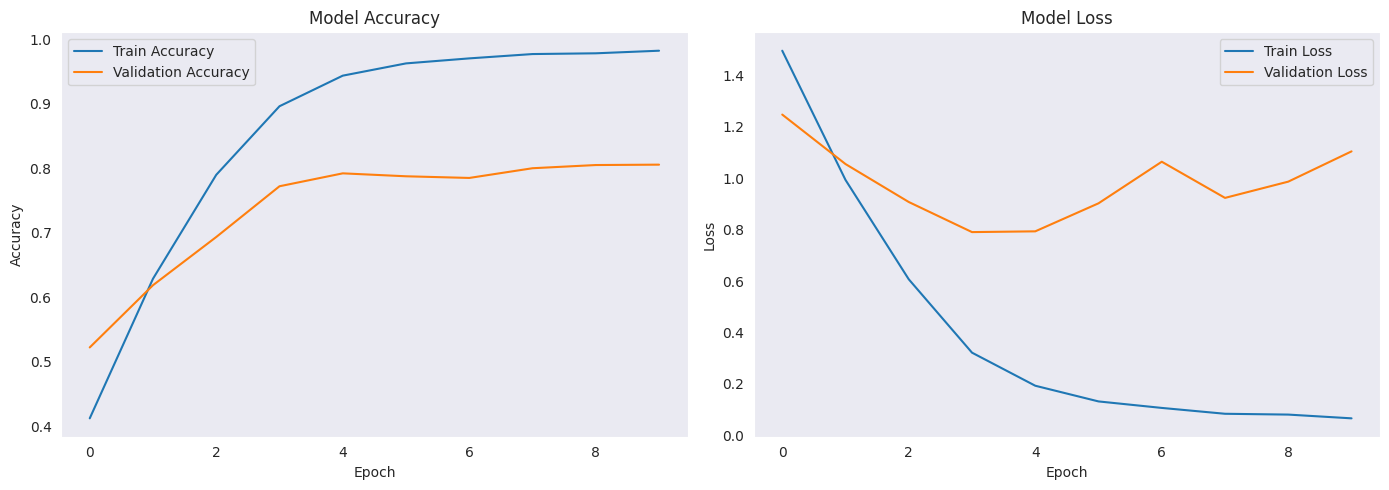

In [75]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

316/316 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step


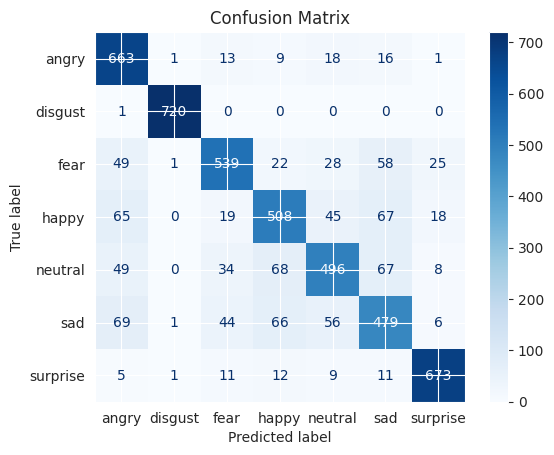

              precision    recall  f1-score   support

       angry       0.74      0.92      0.82       721
     disgust       0.99      1.00      1.00       721
        fear       0.82      0.75      0.78       722
       happy       0.74      0.70      0.72       722
     neutral       0.76      0.69      0.72       722
         sad       0.69      0.66      0.68       721
    surprise       0.92      0.93      0.93       722

    accuracy                           0.81      5051
   macro avg       0.81      0.81      0.81      5051
weighted avg       0.81      0.81      0.81      5051



In [76]:
true_labels = test_gen_new.classes
predicted_labels = model.predict(test_gen_new)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_new.class_indices.keys())
print(report)